# Project
This project is based predicting car fuel effeciency with a model trained on current data.

There are several steps involved in it I have a decent amount of data which I got from https://www.fueleconomy.gov/feg/download.shtml which contains information related to cars and there mpg(miles per gallon).

The problem with this data is although it is excel sheet and csv file. There is still a small amount of incononsistencies in the data. 

Our first few steps will involve making our data uniform and properly labelled, so that our model can easily and effectively train on the model.

Right now I have data from 2000 till 2025. The first problem involves, how can I make the data in a uniform file format, because our data is in mixed files.

Since the majority of data files are in excel format. I will go ahead and make the other .csv files to .xlsx files.

In [2]:
import os
import pandas as pd

In [2]:
# in the bellow cell, we will convert all the .csv files to .xlsx files in order to achieve uniform file format for our data
csv_directory = 'Data/'

for filename in os.listdir(csv_directory):
    if filename.endswith('.csv'):
        
        csv_file = os.path.join(csv_directory, filename)
        df = pd.read_csv(csv_file, on_bad_lines='skip')

        
        
        excel_file = os.path.join(csv_directory, filename.replace('.csv', '.xlsx'))

        df.to_excel(excel_file, index=False)
        print(f'Converted {filename} to {excel_file}')

        os.remove(csv_file)
        print(f'Deleted {csv_file}')

It is visible from the above output that all the files has been converted, now we will proceed with our next inconsistency which is our file names. As you can see all the files have long and different names, which might become a peoblem when we will merge them into one (This is only an assumption). I think the better way to change the names of our file will be if we name it with the year's data it consist. I will try my best to keep this automated but looking at some files. It is not possible, so after automated task, I will perform the remaining manually.

If we notice the patteren most of the recent files follow the same pattren in their names, which will be very helpful to automate the task. The name provide too much information like; release date, etc. This information is not of any use for our application. The only thing we need is year. 

In [3]:
# in the below method we will change the file names for our convinience to work with simplified data

for file in os.listdir("Data/"):
    original = file
    file, extention = file.split(".")
    file = file.replace("_","-")
    file = file.split("-")
    file = file[0].split()
    file = file[0]
    os.rename("Data/"+original, "Data/"+file+"."+extention)
    
print(os.listdir("Data/"))

['2014.xlsx', '2009.xlsx', '2016.xlsx', '2022.xlsx', '2020.xlsx', '2019.xlsx', '2007.xlsx', '2001.xlsx', '2008.xlsx', '2023.xlsx', '2021.xlsx', '2017.xlsx', '2011.xlsx', '2015.xlsx', '2003.xlsx', '2013.xlsx', '2004.xlsx', '2002.xlsx', '2018.xlsx', '2012.xlsx', '2024.xlsx', '2006.xlsx', '2025.xlsx', '2005.xlsx', '2010.xlsx']


After changing the appearance of our files. There is another problem with the data which needs to be addressed. We need a model column in our spreadsheet, which will specify the year in which the car was manufactured. The problem is that all the files before 2010 don't have that column. This issue can be resolved manually and it will not take much time but I think an automated approach will be right way to do.

In [ ]:
import os
import pandas as pd

folder_path = 'Data/'

for filename in os.listdir(folder_path):
    if filename.endswith(".xlsx"):  
        file_path = os.path.join(folder_path, filename)

        df = pd.read_excel(file_path)
        
        if 'Model Year' in df.columns:
            df.rename(columns={'Model Year': 'model'}, inplace=True)
        elif 'Model Yr' in df.columns:
            df.rename(columns={'Model Yr': 'model'}, inplace=True)
        elif 'model' not in df.columns:
            df.insert(0, 'model', filename.removesuffix(".xlsx")) 

        if df.columns[0] != 'model':
            cols = ['model'] + [col for col in df.columns if col != 'model']
            df = df[cols]  

        df.to_excel(file_path, index=False)

        print(f'Processed {filename}: "model" column added or moved to the first position.')

print("Process completed.")


In the above code i just added the model year in the files which did not have that. Also made it uniform in all the files. So that in future it will be easy for me to work with it.

The next step is gathering all the data in a single file but the problem is that there is no consistent headers for each column in our .xlsx files. Fortunetly we have a solution to this. I will be using dictionaries in python where i will mention all the instances of same header and give them a standard and than i will store all the data in a new file and after that our data will be ready to built a model.

In [27]:
import pandas as pd
import glob


column_mapping = {
    'model': 'Model',
    'Manufacturer': 'Manufacturer',
    'MFR': 'Manufacturer',
    'Mfr Name': 'Manufacturer',
    'carline name': 'Carline',
    'CAR LINE': 'Carline',
    'Carline': 'Carline',
    'cyl': 'cyl',
    'NUMB CYL': 'cyl',
    '# Cyl': 'cyl',
    'trans': 'Transmission',
    'TRANS': 'Transmission',
    'Trans as listed in FE Guide (derived from col AA thru AF)': 'Transmission',
    'Trans in FE Guide (MFR entered for data entered after May 13 2011)': 'Transmission',
    'Transmission': 'Transmission',
    'cty': 'cty',
    'CITY MPG (GUIDE)': 'cty',
    'City FE (Guide) - Conventional Fuel': 'cty',
    'hwy': 'hwy',
    'HWY MPG (GUIDE)': 'hwy',
    'Hwy FE (Guide) - Conventional Fuel': 'hwy',
    'cmb': 'cmb',
    'COMB MPG (GUIDE)': 'cmb',
    'Comb FE (Guide) - Conventional Fuel': 'cmb',
    'displ': 'Engine_Size',
    'DISPLACEMENT': 'Engine_Size',
    'Eng Displ': 'Engine_Size'
}


data_frames = []

for file in glob.glob("Data/*.xlsx"): 
    df = pd.read_excel(file, engine='openpyxl')

    df = df.rename(columns={col: column_mapping[col] for col in df.columns if col in column_mapping})
    standardized_df = df.reindex(columns=['Model', 'Manufacturer', 'Carline', 'cyl', 'Transmission', 'cty', 'hwy', 'cmb', 'Engine_Size'])
    data_frames.append(standardized_df)

final_df = pd.concat(data_frames, ignore_index=True)
final_df = final_df.sort_values(by='Model', ascending=True)
final_df['Manufacturer'] = final_df['Manufacturer'].str.upper()
final_df.to_excel('Data/Cleaned_Data.xlsx', index=False)

print("Data successfully consolidated and sorted by Model year into 'Cleaned_Data.xlsx'.")


Data successfully consolidated and sorted by Model year into 'Cleaned_Data.xlsx'.


After the running the above cell our data is finally cleaned and move to one data file. Now we should be able to train our model with this data but before developing a model we will look at our data visually in form of graphs, which will make us understand the patterns and according to these patterns we will decide which model is suitable for this application.

In the below cells we are going to look at our data and try to understand what do we have by looking at it with different techniques.

In [28]:
#we will see how many rows and columns do we have
df = pd.read_excel('Data/Cleaned_Data.xlsx')
df.shape


(27863, 9)

We have 27863 rows and 9 columns. Lets print the header of each column.

As you can see we have first 5 and last five records of our data and the headers. Now lets try to see how many different manufacturers we have.

In [29]:
manufacturers = df['Manufacturer'].unique()
print(manufacturers)
print(len(manufacturers))

['SUZUKI' 'TOYOTA' 'OLDSMOBILE' 'PONTIAC' 'SUBARU' 'MITSUBISHI' 'NISSAN'
 'AUDI' 'BMW' 'CHEVROLET' 'JAGUAR' 'MERCEDES-BENZ' 'PORSCHE' 'PLYMOUTH'
 'GMC' 'DODGE' 'FERRARI' 'R-R MTR CARS LTD.' 'SAAB' 'IMPCO' 'LEXUS'
 'HONDA' 'LAMBORGHINI' 'MAZDA' 'VOLKSWAGEN' 'BENTLEY' 'FORD' 'HYUNDAI'
 'DAEWOO' 'CHRYSLER' 'SATURN' 'KIA' 'LINCOLN-MERCURY' 'INFINITI' 'VOLVO'
 'ACURA' 'BUICK' 'CADILLAC' 'ISUZU' 'MERCURY' 'JEEP' 'LAND ROVER'
 'LINCOLN' 'MASERATI' 'QUANTUM' 'ROUSH PERFORMANCE' 'ASTON MARTIN' 'GM'
 'ALPINA' 'LOTUS' 'MORGAN' 'MINI' 'ROLLS-ROYCE' 'HUMMER' nan 'SPYKR'
 'SHLBY' 'SALEEN PERFORMANCE' 'TCSTR' 'BUGATTI' 'VW' 'FOMOCO'
 'MITSUBISHI MOTORS CO' 'CHRYSLER GROUP LLC' 'MITSUBISHI MOTORS NA'
 'NUMMI' 'JAGUAR CARS' 'GDX' 'ROUSH' 'SPYKER' 'GENERAL MOTORS'
 'FORD MOTOR COMPANY' 'SAAB CARS NORTH AMERICA' 'MAHINDRA' 'VPG'
 'MCLAREN AUTOMOTIVE ' 'JAGUAR LAND ROVER L' 'MOBILITY VENTURES L'
 'PAGANI AUTOMOBILI S' 'FCA US LLC' 'VOLKSWAGEN GROUP OF'
 'QUANTUM FUEL SYSTEM' 'MCLAREN AUTOMOTIVE' 'FCA ITAL

We have 89 manufacturers in our data. Now we are going to print the Carline of a perticular manufacturer. lets say SUZUKI. 

As it can be seen with above techniques we can know more about our data and customize is accordingly in order to find the right model for prediction. 

In [30]:
import numpy as np
def categorize_transmission(trans):
    if pd.isna(trans):  # Handle NaN values
        return np.nan
    elif 'auto' in trans.lower():
        return 'Automatic'
    elif 'manual' in trans.lower():
        return 'Manual'
    else:
        return trans  # Keep as-is if it doesn't match

# Apply the function to the 'transmission' column
df['Transmission'] = df['Transmission'].apply(categorize_transmission)

# Overwrite the existing Excel file with the updated data
df.to_excel('Data/Cleaned_Data.xlsx', index=False)

print("The dataset has been updated and saved to the original file.")


The dataset has been updated and saved to the original file.


# Conclusion
This is the end of first iteration. The goal of this iteration was get fimiliar with how to refine and make a useable data. With Pandas it was fairly easy and there was a learning curve for me as well because I got to work with these technologies for the first time.


# iteration 02
In this iteration. I will do some data visualization and try to understand what machine learning algorithm will help me create a better model using the data I have cleaned. After deciding the model. We will build our model and create predictions.

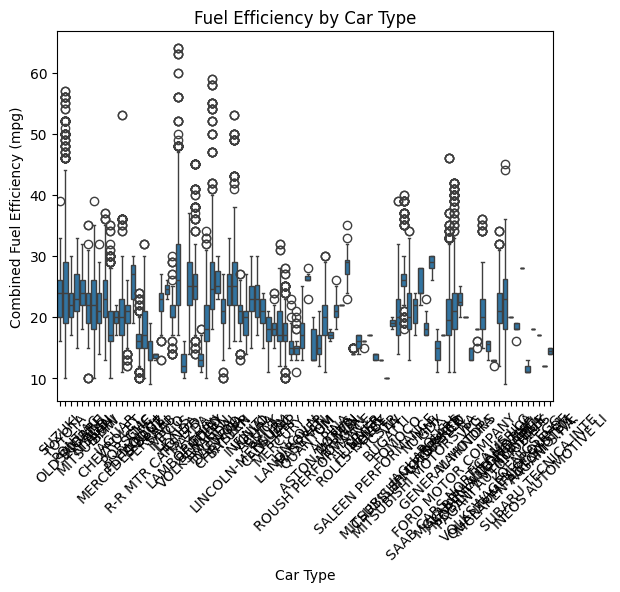

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(data=df, x='Manufacturer', y='cmb')
plt.title("Fuel Efficiency by Car Type")
plt.xlabel("Car Type")
plt.ylabel("Combined Fuel Efficiency (mpg)")
plt.xticks(rotation=45)
plt.show()
